In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## Data Loading and Cleaning

In [76]:
data = pd.read_csv('./DSIB - Use Case Mortgage Holders - Data - part 2.csv')
data_info= data.info()
data_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 784 entries, 0 to 783
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        784 non-null    int64  
 1   Beacon_Score              784 non-null    int64  
 2   Mortgage_Balance          784 non-null    float64
 3   Avg_Monthly_Transactions  784 non-null    int64  
 4   Has_Payroll               784 non-null    int64  
 5   Has_Investment            784 non-null    int64  
 6   Has_Visa                  784 non-null    int64  
 7   VISA_balance              784 non-null    float64
 8   Has_Deposit               784 non-null    int64  
 9   Not_Mortgage_Balance      784 non-null    float64
 10  Services                  784 non-null    int64  
 11  Tenure_In_Months          784 non-null    float64
 12  TermInMonths              784 non-null    int64  
 13  TermToMaturity            784 non-null    float64
 14  InterestRa

In [77]:
# drop columns we won't use or have too many 0's
data.drop(columns=['Has_Payroll', 'Has_Investment', 'Has_Visa', 'Has_Deposit', 'VISA_balance'], inplace=True)
data

,ID,Beacon_Score,Mortgage_Balance,Avg_Monthly_Transactions,Not_Mortgage_Balance,Services,Tenure_In_Months,TermInMonths,TermToMaturity,InterestRate,Closing_status
0,10678,460,930513.00,1,12911.000000,2,35.000000,48,23.5,0.0314,Renewed
1,10483,825,900825.00,111,212295.000000,8,60.000000,48,10.5,0.0309,Renewed
2,10007,801,243846.84,2,259.436667,2,48.166667,60,24.0,0.0385,Run-off
3,10531,815,360233.00,49,7616.000000,4,407.000000,60,5.0,0.0385,Renewed
4,9997,815,360226.24,49,7613.420000,4,407.000000,60,5.0,0.0385,Run-off
...,...,...,...,...,...,...,...,...,...,...,...
779,10298,470,931507.00,1,13210.000000,2,40.000000,48,23.5,0.0314,Renewed
780,10546,819,52509.00,46,207940.000000,6,421.000000,60,17.0,0.0279,Renewed
781,10737,819,52510.00,46,207940.000000,6,421.000000,60,17.0,0.0279,Renewed
782,10393,454,1510558.00,4,97139.000000,2,40.000000,60,25.0,0.0259,Renewed


## Prepare Training and Testing Set

In [78]:
# Encode Label
label_encoder = LabelEncoder()
data['Closing_status'] = label_encoder.fit_transform(data['Closing_status'])
data

,ID,Beacon_Score,Mortgage_Balance,Avg_Monthly_Transactions,Not_Mortgage_Balance,Services,Tenure_In_Months,TermInMonths,TermToMaturity,InterestRate,Closing_status
0,10678,460,930513.00,1,12911.000000,2,35.000000,48,23.5,0.0314,0
1,10483,825,900825.00,111,212295.000000,8,60.000000,48,10.5,0.0309,0
2,10007,801,243846.84,2,259.436667,2,48.166667,60,24.0,0.0385,1
3,10531,815,360233.00,49,7616.000000,4,407.000000,60,5.0,0.0385,0
4,9997,815,360226.24,49,7613.420000,4,407.000000,60,5.0,0.0385,1
...,...,...,...,...,...,...,...,...,...,...,...
779,10298,470,931507.00,1,13210.000000,2,40.000000,48,23.5,0.0314,0
780,10546,819,52509.00,46,207940.000000,6,421.000000,60,17.0,0.0279,0
781,10737,819,52510.00,46,207940.000000,6,421.000000,60,17.0,0.0279,0
782,10393,454,1510558.00,4,97139.000000,2,40.000000,60,25.0,0.0259,0


In [79]:
# Define columns to be used
interested_features = ['Mortgage_Balance', 'Avg_Monthly_Transactions', 'Not_Mortgage_Balance', 'Tenure_In_Months', 'TermInMonths', 'InterestRate']

In [80]:
X = data[interested_features]
y = data['Closing_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(y_train.value_counts())
print(y_test.value_counts())

0    473
1     75
Name: Closing_status, dtype: int64
0    206
1     30
Name: Closing_status, dtype: int64


## Decision Tree with Default parameters

In [81]:
init_dt = DecisionTreeClassifier(random_state=42) # try: max_depth=10, ccp_alpha=ccp_alpha_value, 
init_dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [82]:
# Evaluation
y_pred = init_dt.predict(X_test)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

# Classification Report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Precision: 0.91
Recall: 1.00
F1-Score: 0.95
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99       206
           1       0.91      1.00      0.95        30

    accuracy                           0.99       236
   macro avg       0.95      0.99      0.97       236
weighted avg       0.99      0.99      0.99       236



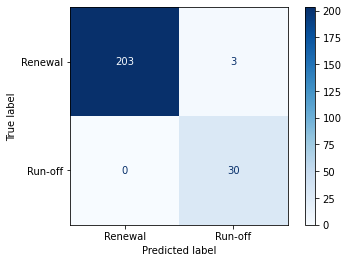

In [83]:
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Renewal', 'Run-off'])

cm_display.plot(cmap='Blues')
plt.show()

Decision Criteria:
 |--- Not_Mortgage_Balance <= 284.51
|   |--- Mortgage_Balance <= 810994.19
|   |   |--- Not_Mortgage_Balance <= 197.42
|   |   |   |--- Not_Mortgage_Balance <= 157.54
|   |   |   |   |--- class: 1
|   |   |   |--- Not_Mortgage_Balance >  157.54
|   |   |   |   |--- TermInMonths <= 42.00
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- TermInMonths >  42.00
|   |   |   |   |   |--- class: 1
|   |   |--- Not_Mortgage_Balance >  197.42
|   |   |   |--- Not_Mortgage_Balance <= 256.22
|   |   |   |   |--- class: 0
|   |   |   |--- Not_Mortgage_Balance >  256.22
|   |   |   |   |--- Mortgage_Balance <= 356453.84
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- Mortgage_Balance >  356453.84
|   |   |   |   |   |--- class: 0
|   |--- Mortgage_Balance >  810994.19
|   |   |--- Not_Mortgage_Balance <= 27.93
|   |   |   |--- class: 1
|   |   |--- Not_Mortgage_Balance >  27.93
|   |   |   |--- class: 0
|--- Not_Mortgage_Balance >  284.51
|   |--- Mortgage_Balance <=

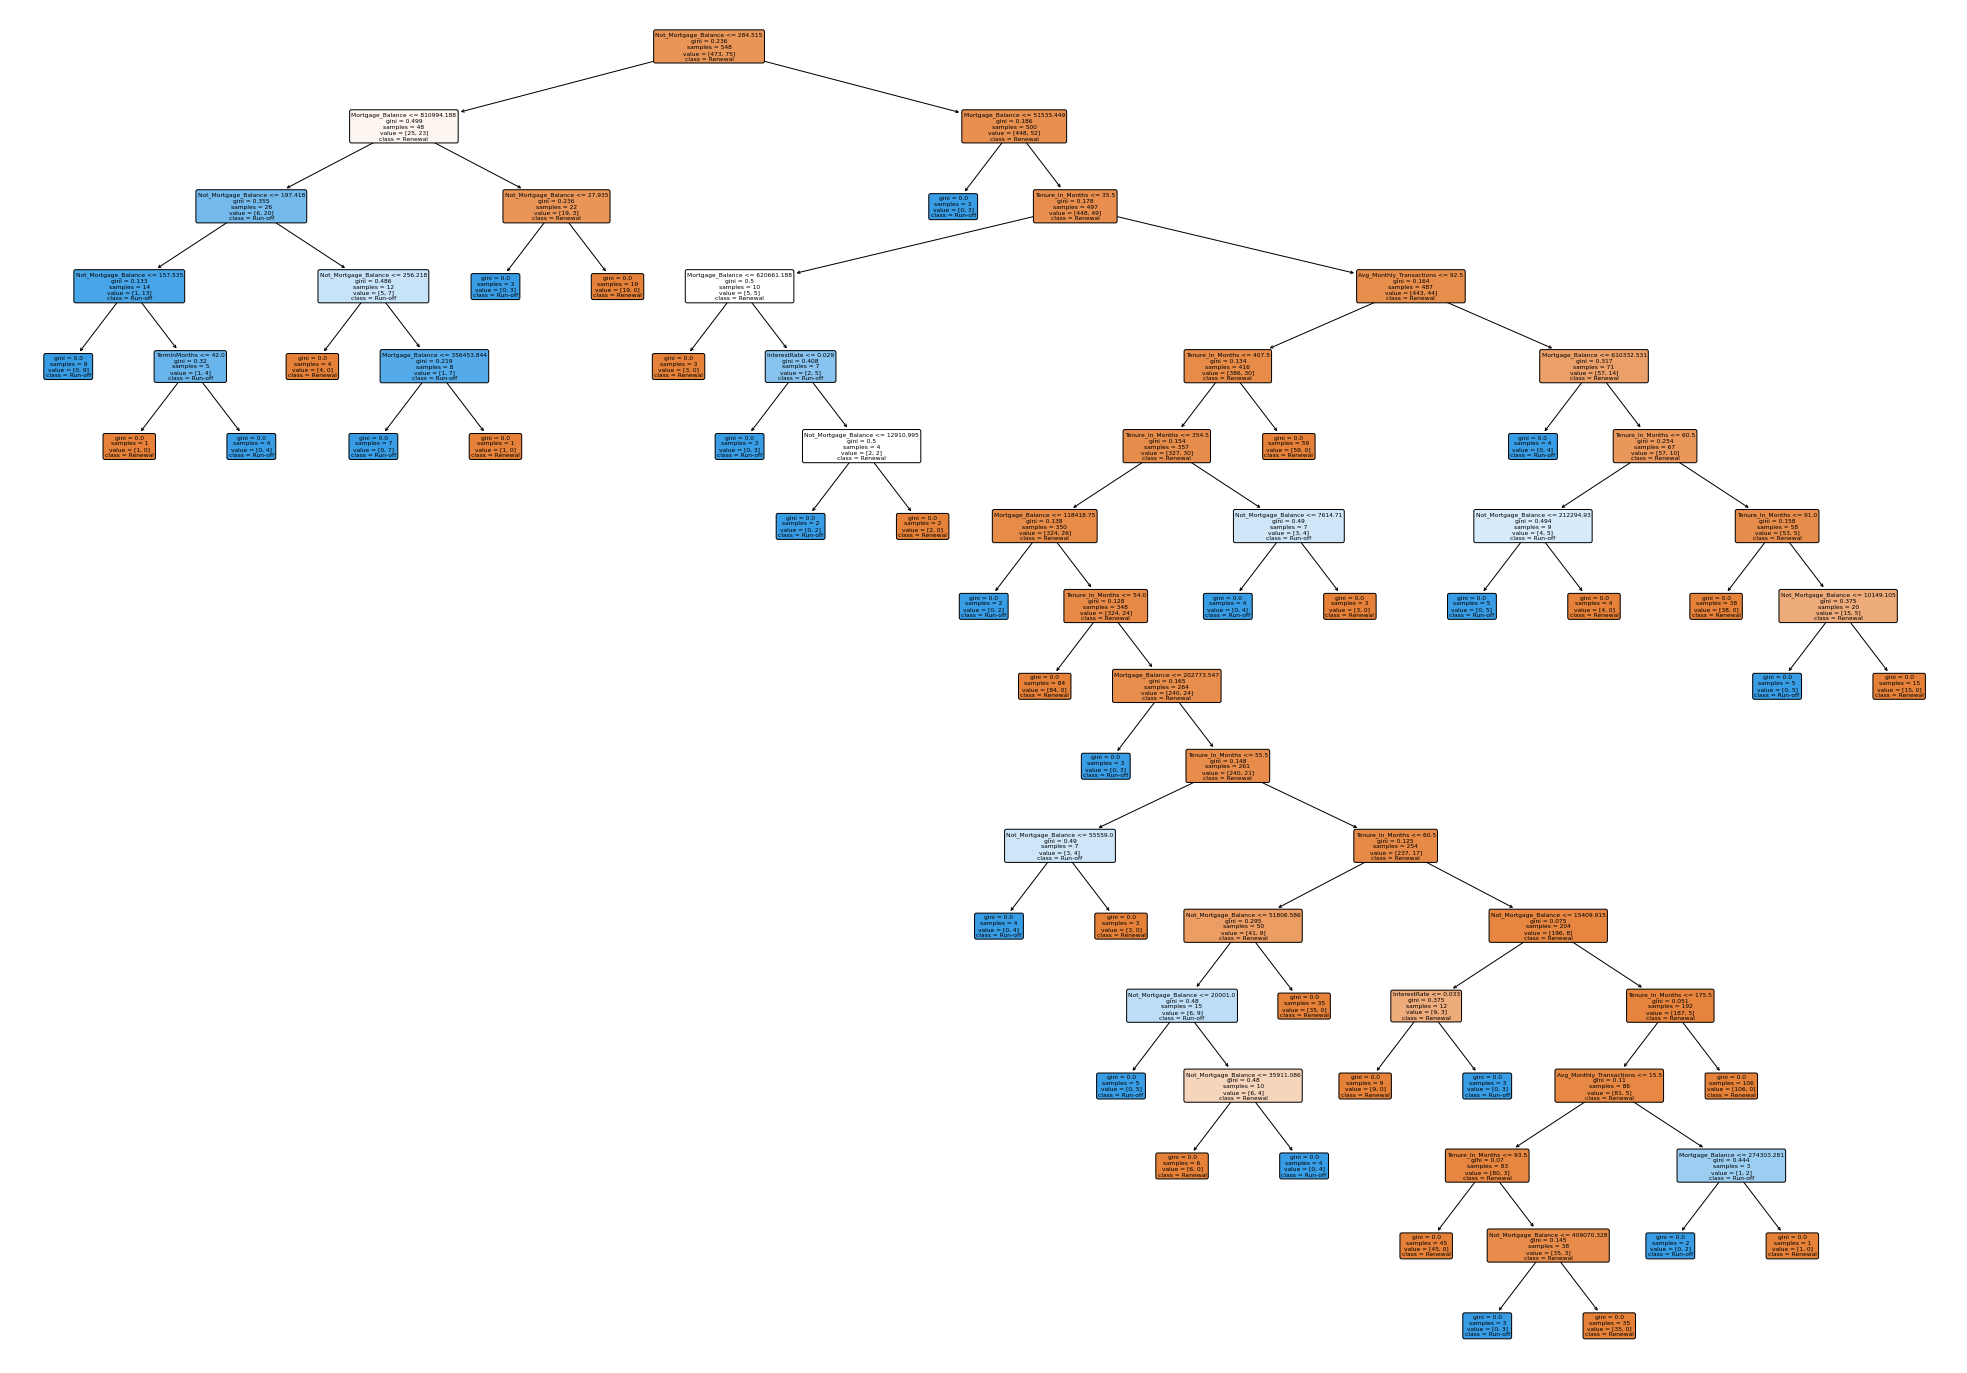

In [84]:
tree_rules = export_text(init_dt, feature_names=list(X_train.columns))
print("Decision Criteria:\n", tree_rules)

plt.figure(figsize=(35, 25))
plot_tree(init_dt, feature_names=interested_features, class_names=['Renewal', 'Run-off'], filled=True, rounded=True)
plt.show()

## Decision Tree with effort to mitigate over-fitting

In [85]:
ccp_alpha_value = 0.005 # For post-pruning by setting ccp_alpha

dt_model = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=3, ccp_alpha=ccp_alpha_value, class_weight='balanced', random_state=42) # try: max_depth=10, ccp_alpha=ccp_alpha_value, 
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.005, class_weight='balanced',
                       criterion='entropy', min_samples_leaf=3,
                       random_state=42)

In [86]:
# Evaluation
y_pred = dt_model.predict(X_test)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

# Classification Report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Precision: 0.73
Recall: 1.00
F1-Score: 0.85
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.97       206
           1       0.73      1.00      0.85        30

    accuracy                           0.95       236
   macro avg       0.87      0.97      0.91       236
weighted avg       0.97      0.95      0.96       236



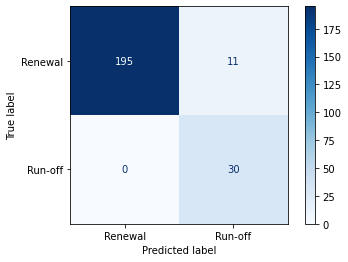

In [87]:
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Renewal', 'Run-off'])

cm_display.plot(cmap='Blues')
plt.show()

Decision Criteria:
 |--- Not_Mortgage_Balance <= 284.51
|   |--- Mortgage_Balance <= 1000929.50
|   |   |--- Mortgage_Balance <= 401949.02
|   |   |   |--- class: 1
|   |   |--- Mortgage_Balance >  401949.02
|   |   |   |--- Not_Mortgage_Balance <= 40.99
|   |   |   |   |--- class: 1
|   |   |   |--- Not_Mortgage_Balance >  40.99
|   |   |   |   |--- class: 0
|   |--- Mortgage_Balance >  1000929.50
|   |   |--- class: 0
|--- Not_Mortgage_Balance >  284.51
|   |--- Not_Mortgage_Balance <= 409070.33
|   |   |--- Tenure_In_Months <= 416.50
|   |   |   |--- Mortgage_Balance <= 118418.75
|   |   |   |   |--- class: 1
|   |   |   |--- Mortgage_Balance >  118418.75
|   |   |   |   |--- Not_Mortgage_Balance <= 2454.32
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Not_Mortgage_Balance >  2454.32
|   |   |   |   |   |--- Tenure_In_Months <= 407.50
|   |   |   |   |   |   |--- Not_Mortgage_Balance <= 10149.10
|   |   |   |   |   |   |   |--- Not_Mortgage_Balance <= 6102.71
|   |   |   | 

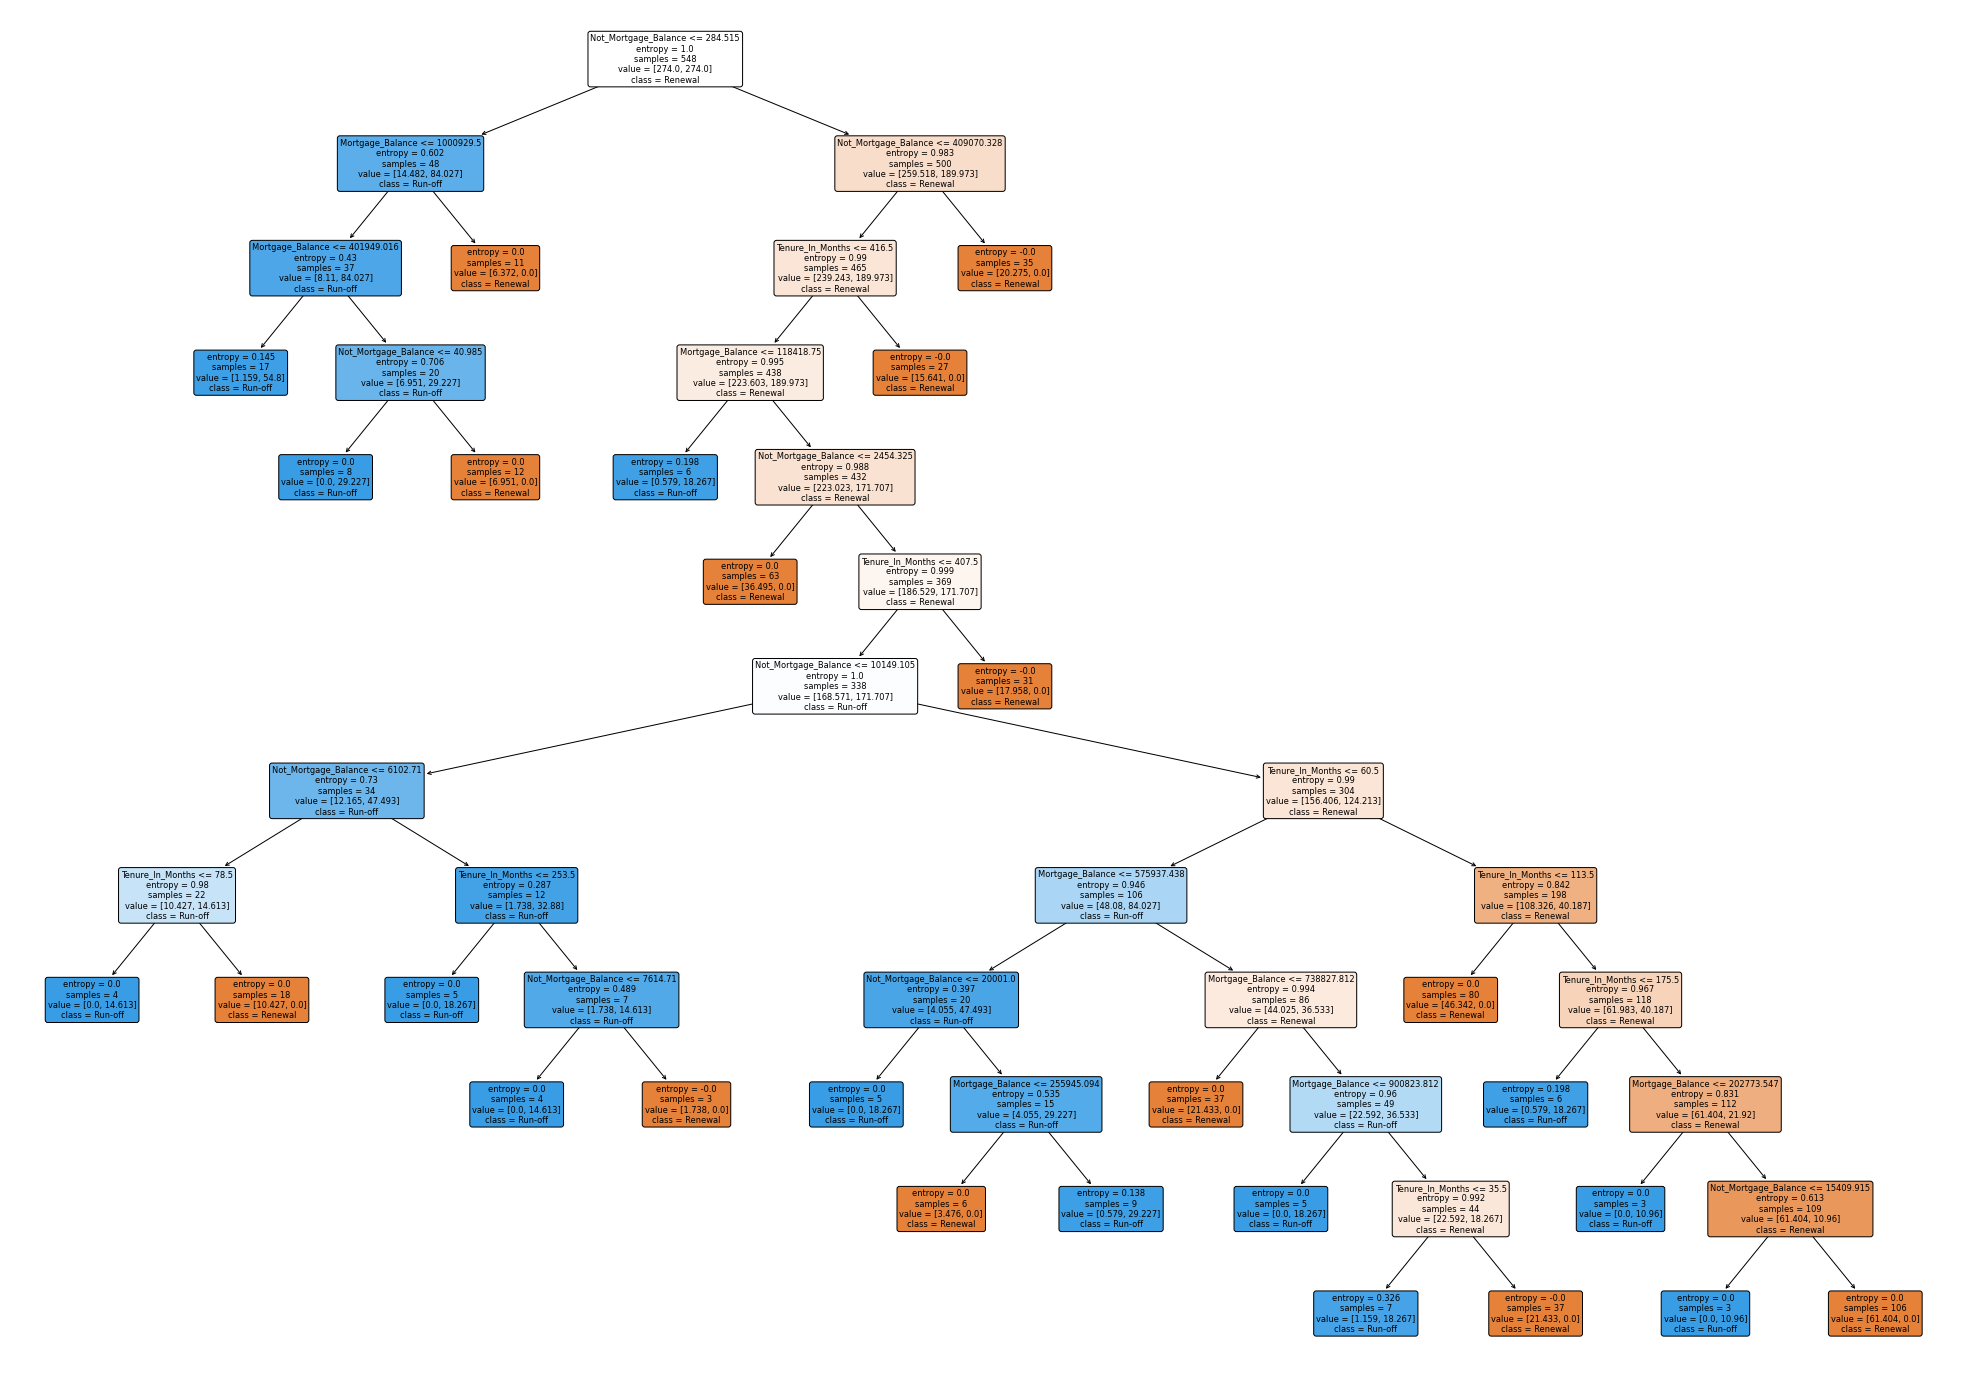

In [88]:
tree_rules = export_text(dt_model, feature_names=list(X_train.columns))
print("Decision Criteria:\n", tree_rules)

plt.figure(figsize=(35, 25))
plot_tree(dt_model, feature_names=interested_features, class_names=['Renewal', 'Run-off'], filled=True, rounded=True)
plt.show()

## Prediction on Part 1 Data

In [89]:
df1 = pd.read_csv('./DSIB - Use Case Mortgage Holders - Data.csv')
X_df1 = df1[interested_features]

In [90]:
df1['Predicted_Closing_Status'] = dt_model.predict(X_df1)
df1['Predicted_Closing_Status'] = label_encoder.inverse_transform(df1['Predicted_Closing_Status'])
run_off = df1[df1['Predicted_Closing_Status'] == 'Run-off']
print(df1['Predicted_Closing_Status'].value_counts())
run_off.to_csv("predicted_run_off_(decision_tree).csv")

Renewed    7497
Run-off    6324
Name: Predicted_Closing_Status, dtype: int64
